<a href="https://colab.research.google.com/github/mjjuhasz/RubberDucky/blob/master/GAN_Laboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.keras.backend.clear_session() 
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [ ]:
# Multimodal Test Case
t1 = np.linspace(0, 10, 1000)
noise1 = np.random.normal(0, 1, len(t1))
y1 = t1 + 10 + noise1
y2 = .25 * t1 + 2 + noise1
y3 = .5 * t1 + 10 + noise1
yc = np.concatenate((y1, y2, y3),axis=0)
tc = np.concatenate((t1, t1, t1+12), axis=0)
SimData = np.column_stack(tup=[tc,yc])

In [ ]:
plt.plot(t1, y1)
plt.plot(t1, y2)
plt.plot(t1+12,y3)
plt.show()

plt.plot(tc, yc)
plt.show()

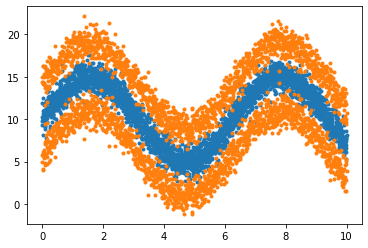

In [ ]:
# Sine Test Case
t1 = np.linspace(0, 10, 3000)
t2 = np.linspace(0,10,1500)
noise1 = np.random.normal(0, 1, len(t1))
noise2 = np.random.normal(4, 1, len(t2))
y1 = (5 * np.sin(t1) + noise1) + 10
y2 = (5 * np.sin(t2) + noise2) + 10
y3 = (5 * np.sin(t2) - noise2) + 10
TestData = np.column_stack(tup=[t1,y1])
FalseData = np.concatenate(([t2,y2],[t2,y3]),axis=1)
FalseData = FalseData.T
plt.plot(t1,y1,ls='',marker='.')
plt.plot(FalseData[:,0],FalseData[:,1],ls='',marker='.')
plt.show()
TLabel = np.ones((len(t1),1))
FLabel = np.zeros((2*len(t2),1))
Labels = np.concatenate((TLabel, FLabel),axis=0)
Combine = np.concatenate((TestData, FalseData),axis=0)

# Standardize ranges
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Scaled Array
Scaler = MinMaxScaler(feature_range=(-1, 1))
# Scaler=StandardScaler()
Scaler.fit(Combine)
SSimData = Scaler.transform(Combine)

In [ ]:
Combine = np.concatenate((TestData, FalseData),axis=0)
Combine.shape

(6000, 2)

In [ ]:
# Standardize ranges
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scaled Array
Scaler = MinMaxScaler(feature_range=(-.9, .9))
#Scaler=StandardScaler()
Scaler.fit(SimData)
SSimData = Scaler.transform(SimData)

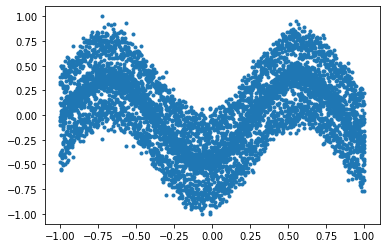

In [ ]:
#plt.plot(Tx,Ty, ls='',marker='.')
plt.plot(SSimData[::,0],SSimData[::,1], ls='', marker='.')
plt.show()

In [ ]:
TLabel = np.ones((SSimData.shape[0]))
FLabel = np.zeros((Tx.shape[0]))
Pos = np.column_stack(tup=[SSimData,TLabel])
Neg = np.column_stack(tup=[Tx, Ty, FLabel])
Stack = np.concatenate((Pos, Neg), axis=0)

In [ ]:
SDataset=tf.convert_to_tensor(Stack, dtype=tf.float32)

In [ ]:
dataset = tf.data.Dataset.from_tensors(SDataset)

**Load and preprocess data.**





In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving PH138MLData.xlsx to PH138MLData.xlsx
User uploaded file "PH138MLData.xlsx" with length 38645 bytes


In [ ]:
# load the dataset

import pandas as pd

df = pd.read_excel('PH138MLData.xlsx', sheet_name='Data_LHI')

In [ ]:
lt = df['Aspect Ratio'] <= .525
gt = df['Aspect Ratio'] >= .475
ButterZone = lt & gt
UB = df['Aspect Ratio'] > .525
LB = df['Aspect Ratio'] < .475
AllElse = UB | LB
ButterZone_df=df[ButterZone]
AllElse_df=df[AllElse]
ButterZone_df

In [ ]:
# Standardize ranges
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scaled Array
#Scaler = MinMaxScaler(feature_range=(-1, 1))
Scaler=StandardScaler()
Scaler.fit(df[['Linear Heat Input (J/mm)', 'Mass Flow (g/min)']])
DataArray_ButterZone = Scaler.transform(ButterZone_df[['Linear Heat Input (J/mm)', 'Mass Flow (g/min)']])
DataArray_AllElse = Scaler.transform(AllElse_df[['Linear Heat Input (J/mm)', 'Mass Flow (g/min)']])

# Scaled Dataframe
# df_scaled=df.apply(preprocessing.scale)

In [ ]:
pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
def black_box_function(x, y):
    return -x ** 2 - (y - 1) ** 2 + 1

In [ ]:
# Bounded region of parameter space
pbounds = {'x': (2, 4), 'y': (-3, 3)}
optimizer = BayesianOptimization(f=black_box_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1)

In [ ]:
optimizer.maximize(
    init_points=5,
    n_iter=15)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  6        | -16.13    |  2.294    | -2.446    |
|  7        | -8.341    |  2.373    | -0.9266   |
|  8        | -7.392    |  2.794    |  0.2329   |
|  9        | -7.069    |  2.838    |  1.111    |
|  10       | -6.412    |  2.409    |  2.269    |
|  11       | -4.368    |  2.307    |  0.786    |
|  12       | -5.002    |  2.421    |  0.6217   |
|  13       | -3.309    |  2.069    |  0.8302   |
|  14       | -3.007    |  2.0      |  1.086    |
|  15       | -3.001    |  2.0      |  0.9717   |
|  16       | -3.121    |  2.0      |  1.347    |
|  17       | -3.287    |  2.0      |  0.4645   |
|  18       | -3.068    |  2.0      |  0.7395   |
|  19       | -3.012    |  2.0      |  0.8913   |
|  20       | -3.04     |  2.0      |  1.199    |
|  21       | -3.0      |  2.0      |  1.008    |
|  22       | -3.001    |  2.0      |  0.9737   |
|  23       | -3.009    |  2.002    |  0.9773   |


In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_ncs_BZ[::,0],x_ncs_BZ[::,1],ls='',marker='.')
plt.plot(x_ncs_AE[::,0],x_ncs_AE[::,1],ls='',marker='+')
plt.show()

In [ ]:
BZ_dataset=tf.convert_to_tensor(DataArray_ButterZone, dtype=tf.float32)
AE_dataset=tf.convert_to_tensor(DataArray_AllElse, dtype=tf.float32)

In [ ]:
def build_generator(Latent_space,Neurons,NumLayers):
  Ridge=0.0
  Lasso=0.0
  regRL=tf.keras.regularizers.L1L2(l1=Ridge, l2=Lasso)
  # Create Input Layer
  inputs = tf.keras.layers.Input(shape=(Latent_space,))
  x = layers.Dense(Neurons, use_bias=True, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=21), bias_initializer='zeros')(inputs)
  x = layers.ELU(alpha=1.0)(inputs)
  # Hidden Layers
  for n in range(0,NumLayers):
    x = layers.BatchNormalization(momentum=0.1, epsilon=0.005, center=True, scale=True)(x)
    x = layers.Dense(Neurons, use_bias=True, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=21), bias_initializer='zeros', kernel_regularizer=regRL)(x)
    x = layers.ELU(alpha=1.0)(x)
  # Create Output Layer
  outputs = layers.Dense(2, activation='tanh', use_bias=True, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=21), bias_initializer='zeros')(x)
  model=tf.keras.Model(inputs=inputs,outputs=outputs)
  return model

In [ ]:
def build_discriminator(Neurons,NumLayers):
  Ridge=0.0
  Lasso=0.0
  regRL=tf.keras.regularizers.L1L2(l1=Ridge, l2=Lasso)
  # Create Input Layer
  inputs = tf.keras.layers.Input(shape=(2,))
  x = layers.Dense(Neurons, use_bias=True, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=21), bias_initializer='zeros')(inputs)
  x = layers.ELU(alpha=1.0)(inputs)
  # Hidden Layers
  for n in range(0,NumLayers):
    x = layers.BatchNormalization(momentum=0.1, epsilon=0.005, center=True, scale=True)(x)
    x = layers.Dense(Neurons, use_bias=True, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=21), bias_initializer='zeros', kernel_regularizer=regRL)(x)
    x = layers.ELU(alpha=1.0)(x)
  # Create Output Layer
  outputs = layers.Dense(1, activation=keras.activations.sigmoid)(x)
  model=tf.keras.Model(inputs=inputs,outputs=outputs)
  return model

In [ ]:
Latent_space = 10
g_side = build_generator(Latent_space, 50, 6)
d_side = build_discriminator(50, 6)

In [ ]:
BZgenerator.summary()

In [ ]:
# Jenson Shannon Entropy Loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(.9*tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
# Jenson Shannon Entropy Loss with Feature Matching
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(1*tf.ones_like(real_output), real_output) + tf.nn.l2_loss(tf.ones_like(real_output) - real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) + tf.nn.l2_loss(tf.zeros_like(fake_output) - fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

def generator_loss(groundtruth, fake_output):
  loss = cross_entropy(tf.ones_like(fake_output), fake_output) + tf.nn.l2_loss(groundtruth - fake_output)
  return loss

In [ ]:
# Wasserstein Loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output, fake_output):
  loss = tf.reduce_mean(fake_output*real_output)
  return loss

def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
# MAE Loss Function
def discriminator_loss(real_output, fake_output):
  difference = real_output - fake_output
  total_loss = tf.reduce_mean(tf.math.abs(difference))
  return total_loss

def generator_loss(fake_output):
  difference = tf.ones_like(fake_output) - fake_output
  total_loss = tf.reduce_mean(tf.math.abs(difference))
  return total_loss

In [ ]:
# Least Squares Loss
def discriminator_loss(real_output, fake_output):
  real_loss = tf.reduce_mean((real_output-tf.ones_like(real_output))**2)
  fake_loss = tf.reduce_mean((fake_output+tf.ones_like(fake_output))**2)
  total_loss = .5 * (real_loss + fake_loss)
  return total_loss

def generator_loss(fake_output):
  fake_loss = tf.reduce_mean((fake_output)**2)
  total_loss = .5 * (fake_loss)
  return total_loss

In [ ]:
def plot_ganperf(gen_loss,disc_loss):
  plt.plot(gen_loss,label='Generator Loss',ls='-')
  plt.plot(disc_loss,label='Discriminator Loss',ls='-')
  plt.show()

In [ ]:
def BatchandShuffle(dataset, batch_size):
  Batch = np.random.randint(1,dataset.shape[0],batch_size)
  Dataset = dataset
  #Dataset = dataset.numpy()
  Dataset = Dataset[Batch]
  SDataset=tf.convert_to_tensor(Dataset, dtype=tf.float32)
  return SDataset

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-2)
discriminator_optimizer = tf.keras.optimizers.SGD(1e-3)

In [ ]:
EPOCHS = 500
batch_size=500
dloss, gloss = list(), list()

In [ ]:
EPOCHS = 500
Latent_space=2
BZ_batch_size=DataArray_AllElse
AE_batch_size=DataArray_AllElse.shape[0]
dloss, gloss = list(), list()

In [ ]:
GANData = tf.convert_to_tensor(SSimData, dtype=tf.float32)

In [ ]:
def GANtraining(dataset, batch_size, epochs, generator, discriminator):
  for epoch in range(epochs):
    start = time.time()
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      noise = tf.random.truncated_normal([batch_size, Latent_space])
      generated_data=generator(noise,training=True)
      real_output = discriminator(dataset, training=True)
      if (epoch + 1) >= epochs/10:
        fake_output = discriminator(generated_data, training=True)
      else: 
        fake_output = discriminator(generated_data, training=False)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

      gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
      gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

      generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
      discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    if (epoch + 1) % 10 == 0:
      gloss.append(gen_loss.numpy())
      dloss.append(disc_loss.numpy())

    print ('Time for epoch {} is {} sec. Gen loss = {}, Disc Loss = {}'.format(epoch + 1, time.time()-start, gen_loss, disc_loss))
  plot_ganperf(gloss,dloss)

In [ ]:
def GANtraining(dataset, batch_size, epochs, generator, discriminator):
  for epoch in range(epochs):
    start = time.time()
    for batch in np.arange(np.floor(dataset.shape[0] / batch_size)):
      BnS = BatchandShuffle(dataset, batch_size)
      with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        noise = tf.random.truncated_normal([batch_size, Latent_space])
        generated_data = generator(noise,training=True)
        real_output = discriminator(BnS, training=True)
        #fake_output = discriminator(generated_data, training=True)
        if (epoch + 1) >= epochs/4:
          fake_output = discriminator(generated_data, training=True)
        else: 
          fake_output = discriminator(generated_data, training=False)

        gen_loss = generator_loss(BnS, fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
      if (epoch + 1) % 10 == 0:
        gloss.append(gen_loss.numpy())
        dloss.append(disc_loss.numpy())

    print ('Time for epoch {} is {} sec. Gen loss = {}, Disc Loss = {}'.format(epoch + 1, time.time()-start, gen_loss, disc_loss))
  plot_ganperf(gloss,dloss)

In [ ]:
GANtraining(SSimData, batch_size, EPOCHS, g_side, d_side)

In [ ]:
EPOCHS = 500
batch_size=50
Disc_Prob, Gen_Prob, dloss, gloss = list(), list(), list(), list()

In [ ]:
# Triphasic Training
def GANtraining(dataset, batch_size, epochs, generator, discriminator):
  GProbs = 0
  while GProbs < .95:
    if GProbs > .925:
      Gen_optimizer = tf.keras.optimizers.Adam(1e-2)
    else:
      Gen_optimizer = tf.keras.optimizers.Adam(1e-3)
    with tf.GradientTape() as gen_tape:
      noise = tf.random.truncated_normal([batch_size, Latent_space])
      generated_data = generator(noise, training=True)
      fake_output = discriminator(generated_data, training=False)
      gen_loss = triphasic_loss(fake_output)
      GProbs = tf.divide(tf.reduce_sum(fake_output), tf.reduce_sum(tf.ones_like(fake_output)))
      gradients_of_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
      Gen_optimizer.apply_gradients(zip(gradients_of_gen, generator.trainable_variables))
    # if (epoch + 1) % 10 == 0:
      Gen_Prob.append(GProbs.numpy())
    print ('Generator Probability = {}'.format(GProbs))
  for epoch in range(epochs):
    start = time.time()
    generator_optimizer = tf.keras.optimizers.Adam(1e-2)
    discriminator_optimizer = tf.keras.optimizers.SGD(1e-3)
    for batch in np.arange(np.floor(dataset.shape[0] / batch_size)):
      BnS = BatchandShuffle(dataset, batch_size)
      with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        noise = tf.random.truncated_normal([batch_size, Latent_space])
        generated_data = generator(noise,training=True)
        real_output = discriminator(BnS, training=True)
        fake_output = discriminator(generated_data, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
        RProb = tf.divide(tf.reduce_sum(real_output), tf.reduce_sum(tf.ones_like(real_output)))
        FProb = tf.divide(tf.reduce_sum(fake_output), tf.reduce_sum(tf.ones_like(fake_output)))
      if (epoch + 1) % 10 == 0:
        gloss.append(gen_loss.numpy())
        dloss.append(disc_loss.numpy())
    print('Time for epoch {} is {} sec. Gen loss = {}, Disc Loss = {}'.format(epoch + 1, time.time()-start, gen_loss, disc_loss))
    print('Probability on real data {}. Probability on fake data {}'.format(RProb, FProb))
  plot_ganperf(gloss,dloss)

In [ ]:
def DTraining(dataset, batch_size, discriminator):
  DProbs = 0
  m = tf.keras.metrics.Accuracy()
  while DProbs < .95:
    if DProbs < .94:
      Disc_optimizer = tf.keras.optimizers.SGD(1e-2)
    else:
      Disc_optimizer = tf.keras.optimizers.SGD(1e-3)
    BnS = BatchandShuffle(dataset, batch_size)
    with tf.GradientTape() as disc_tape:
      real_output = discriminator(BnS, training=True)
      disc_loss = 
      m.update_state(tf.ones_like(real_output), real_output)
      DProbs = m.result().numpy()
      gradients_of_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
      Disc_optimizer.apply_gradients(zip(gradients_of_disc, discriminator.trainable_variables))
    print ('Discriminator Probability = {}'.format(DProbs))

In [ ]:
DTraining(SSimData, 1000, d_side)

In [ ]:
def GTraining(Latent_space,batch_size,generator,discriminator):
  GProbs = 0
  while GProbs < .95:
    if GProbs < .9:
      Gen_optimizer = tf.keras.optimizers.Adam(1e-2)
    else:
      Gen_optimizer = tf.keras.optimizers.Adam(1e-3)
    with tf.GradientTape() as gen_tape:
      noise = tf.random.truncated_normal([batch_size, Latent_space])
      generated_data = generator(noise, training=True)
      fake_output = discriminator(generated_data, training=False)
      gen_loss = generator_loss(fake_output)
      GProbs = tf.divide(tf.reduce_sum(fake_output), tf.reduce_sum(tf.ones_like(fake_output)))
      gradients_of_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
      Gen_optimizer.apply_gradients(zip(gradients_of_gen, generator.trainable_variables))
    # if (epoch + 1) % 10 == 0:
      Gen_Prob.append(GProbs.numpy())
    print ('Generator Probability = {}'.format(GProbs))

In [ ]:
GTraining(Latent_space,batch_size,g_side,d_side)

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4)
d_side.compile(optimizer=optimizer, loss=generator_loss, metrics='accuracy')
monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=(1e-3), patience=150, verbose=0, mode='auto', restore_best_weights=True)

In [ ]:
d_side.fit(Combine,Labels,validation_split=.2,batch_size=1000,callbacks=monitor,verbose=1,epochs=2000,shuffle=True)

In [ ]:
stuff = np.random.normal(0,1,[10000,2])
output = d_side(stuff, training=False)
output = output.numpy()
T = output >= .8
s1 = stuff[:,0]
s2 = stuff[:,1]
s1 = np.reshape(s1, [10000,1])
s2 = np.reshape(s2, [10000,1])
s1 = s1[T]
s2 = s2[T]

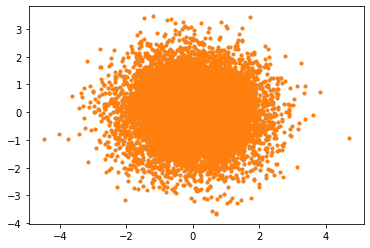

In [ ]:
plt.plot(stuff[::,0],stuff[::,1],ls='',marker='.',alpha=.25)
plt.plot(s1,s2,ls='',marker='.')
#plt.xlim(-1,1)
#plt.ylim(-1,1)
plt.show()

In [ ]:
theta = 2 * np.pi * np.random.normal(0,1,3000);
r = 2.5 + 2 * np.random.normal(0,.25,3000);
Tx = r * np.cos(theta)
Ty = r * np.sin(theta)

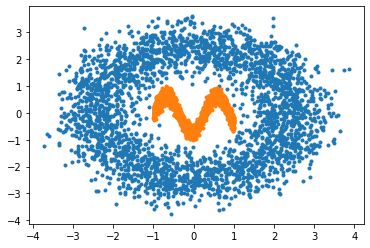

In [ ]:
plt.plot(Tx,Ty, ls='',marker='.')
plt.plot(SSimData[::,0],SSimData[::,1], ls='', marker='.')
plt.show()

In [ ]:
import seaborn as sns

latent=tf.random.normal([10000,Latent_space])
newdata=g_side(latent, training=False)

NPlatent=latent.numpy()

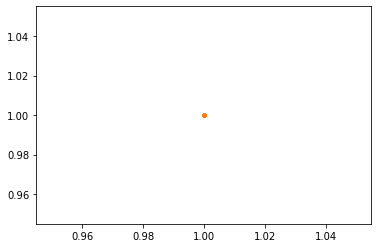

In [ ]:
#plt.plot(SSimData[::,0],SSimData[::,1],ls='',marker='.')
#plt.plot(SDataset[::,0],SDataset[::,1],ls='',marker='.')
plt.plot(newdata[::,0],newdata[::,1],ls='',marker='.',color='tab:orange',alpha=.5)
#plt.xlim((-2,2))
#plt.ylim((-2,2))
plt.show()

#plt.plot(newdata[::,0],newdata[::,1],ls='',marker='.',color='tab:orange',alpha=.25)
#plt.xlim((-2,2))
#plt.ylim((-2,2))
#plt.show()

In [ ]:
import seaborn as sns

latent=tf.random.truncated_normal([10000,Latent_space])
BZnewdata=BZgenerator(latent, training=False)
AEnewdata=AEgenerator(latent, training=False)

NPlatent=latent.numpy()

NameError: ignored

In [ ]:
DA_ButterZone = Scaler.inverse_transform(DataArray_ButterZone)
BZnewdata = Scaler.inverse_transform(BZnewdata)
DA_AllElse = Scaler.inverse_transform(DataArray_AllElse)
AEnewdata = Scaler.inverse_transform(AEnewdata)

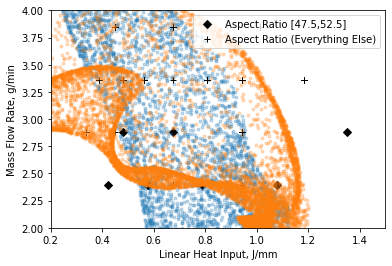

In [ ]:
plt.plot(DA_ButterZone[::,0],DA_ButterZone[::,1], ls='' ,marker='D',color='black',alpha=1,label='Aspect Ratio [47.5,52.5]')
plt.plot(BZnewdata[::,0],BZnewdata[::,1], ls='', marker='.', alpha=.25, color='tab:blue')
plt.plot(DA_AllElse[::,0],DA_AllElse[::,1], ls='' ,marker='+', color='black',alpha=1, label='Aspect Ratio (Everything Else)')
plt.plot(AEnewdata[::,0],AEnewdata[::,1], ls='',marker='.', alpha=.25, color='tab:orange')
plt.xlim(0.2,1.5)
plt.ylim(2,4)
plt.xlabel('Linear Heat Input, J/mm')
plt.ylabel('Mass Flow Rate, g/min')
plt.legend()
plt.savefig('GAN2.png',dpi=600)
plt.show()

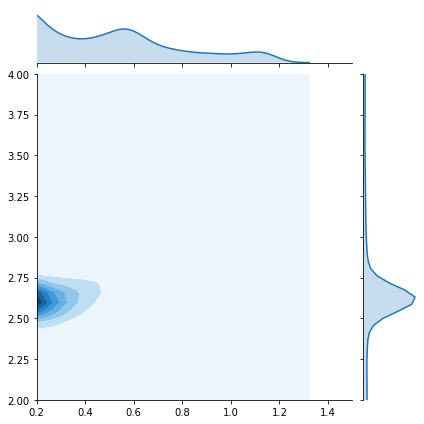

In [ ]:
sns.jointplot(BZnewdata[::,0],BZnewdata[::,1], kind="kde", xlim=(0.2,1.5), ylim=(2,4))

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/SavedModels/'

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
files.download('GAN2.png')

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
AEgenerator.save(base_dir + 'AllElseGanPH.h5') 